In [64]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json 
import time
import regex as re
## config class to store secret are are not coing to be shared 
from config import  G



In [65]:
#Read CSV file 
twitter_archive = pd.read_csv('./dataset/twitter-archive-enhanced-2.csv')
twitter_archive.sort_values('timestamp')
twitter_archive.head(10).T

,0,1,2,3,4,5,6,7,8,9
tweet_id,892420643555336193,892177421306343426,891815181378084864,891689557279858688,891327558926688256,891087950875897856,890971913173991426,890729181411237888,890609185150312448,890240255349198849
in_reply_to_status_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_reply_to_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timestamp,2017-08-01 16:23:56 +0000,2017-08-01 00:17:27 +0000,2017-07-31 00:18:03 +0000,2017-07-30 15:58:51 +0000,2017-07-29 16:00:24 +0000,2017-07-29 00:08:17 +0000,2017-07-28 16:27:12 +0000,2017-07-28 00:22:40 +0000,2017-07-27 16:25:51 +0000,2017-07-26 15:59:51 +0000
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,This is Phineas. He's a mystical boy. Only eve...,This is Tilly. She's just checking pup on you....,This is Archie. He is a rare Norwegian Pouncin...,This is Darla. She commenced a snooze mid meal...,This is Franklin. He would like you to stop ca...,Here we have a majestic great white breaching ...,Meet Jax. He enjoys ice cream so much he gets ...,When you watch your owner call another dog a g...,This is Zoey. She doesn't want to be one of th...,This is Cassie. She is a college pup. Studying...
retweeted_status_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweeted_status_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweeted_status_timestamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expanded_urls,https://twitter.com/dog_rates/status/892420643...,https://twitter.com/dog_rates/status/892177421...,https://twitter.com/dog_rates/status/891815181...,https://twitter.com/dog_rates/status/891689557...,https://twitter.com/dog_rates/status/891327558...,https://twitter.com/dog_rates/status/891087950...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",https://twitter.com/dog_rates/status/890729181...,https://twitter.com/dog_rates/status/890609185...,https://twitter.com/dog_rates/status/890240255...


In [66]:
#URL downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('./dataset/image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('./dataset/image-predictions.tsv', sep='\t' )


In [67]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [68]:
# use tweepy
auth = tweepy.OAuth2BearerHandler(G.BEARER_TOKEN)
api = tweepy.API(auth)


In [69]:
df_list = []
error_list = []

start = time.time()

# append each  tweet json to dataframe df_list
for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')._json 
        favorites = tweet['favorite_count'] # tweet's favorites
        retweets = tweet['retweet_count'] 
        user_followers = tweet['user']['followers_count'] 
        user_favourites = tweet['user']['favourites_count'] # user's favorites
        date_time = tweet['created_at'] # The date and time of the creation
        
        df_list.append({'tweet_id': int(tweet_id), 'favorites': int(favorites), 'retweets': int(retweets),
                        'user_followers': int(user_followers), 'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
        
    except Exception as e:
        print(str(tweet_id)+ " __ " + str(e))
        error_list.append(tweet_id)
        

end = time.time()
print(end - start)

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

888202515573088257 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

873697596434513921 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


872668790621863937 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


872261713294495745 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

869988702071779329 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

866816280283807744 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

861769973181624320 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

856602993587888130 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


856330835276025856 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

851953902622658560 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


851861385021730816 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

845459076796616705 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


844704788403113984 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


842892208864923648 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

837366284874571778 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


837012587749474308 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

829374341691346946 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

827228250799742977 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

812747805718642688 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

802247111496568832 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

779123168116150273 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

775096608509886464 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

771004394259247104 __ 403 Forbidden
179 - Sorry, you are not authorized to see this status.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


770743923962707968 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

766864461642756096 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

759923798737051648 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


759566828574212096 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

754011816964026368 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

680055455951884288 __ 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

679511351870550016 __ 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679503373272485890 __ 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679475951516934144 __ 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679462823135686656 __ 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679405845277462528 __ 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679158373988876288 __ 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679148763231985668 __ 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679132435750195208 __ 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679111216690831360 __ 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679062614270468097 __ 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679047485189439488 __ 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679001094530465792 __ 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

2412.6457929611206


In [74]:

print("The lengh of the result", len(df_list))
print("The lengh of the errors", len(error_list))

The lengh of the result 2315
The lengh of the errors 41


In [75]:
# Create DataFrames 'json' and save it in a file
json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets', 'user_followers','user_favourites', 'date_time'])
json_tweets.to_csv('./dataset/tweet_json.txt', encoding = 'utf-8', index=False)
json_tweets.head(5)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,33698,6978,9347266,147227,2017-08-01 16:23:56+00:00
1,892177421306343426,29232,5280,9347230,147223,2017-08-01 00:17:27+00:00
2,891815181378084864,21974,3466,9347266,147227,2017-07-31 00:18:03+00:00
3,891689557279858688,36778,7190,9347230,147223,2017-07-30 15:58:51+00:00
4,891327558926688256,35169,7723,9347230,147223,2017-07-29 16:00:24+00:00


In [76]:
tweet_data = pd.read_csv('./dataset/tweet_json.txt', encoding = 'utf-8')
tweet_data.head(5)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,33698,6978,9347266,147227,2017-08-01 16:23:56+00:00
1,892177421306343426,29232,5280,9347230,147223,2017-08-01 00:17:27+00:00
2,891815181378084864,21974,3466,9347266,147227,2017-07-31 00:18:03+00:00
3,891689557279858688,36778,7190,9347230,147223,2017-07-30 15:58:51+00:00
4,891327558926688256,35169,7723,9347230,147223,2017-07-29 16:00:24+00:00


## Gathering Summary


We finished the first step in the data wrangling. We managed to gather data from an existing csv file, downloaded a tsv file and queried Twitter's API using Tweepy. Finally, we imported the data into the Jupyter Notebook.

In [77]:
#Random samples to assess visually
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1794,677328882937298944,NaN,NaN,2015-12-17 03:26:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. All the dogs adore Derek. He's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677328882...,10,10,Derek,None,None,None,None
2104,670668383499735048,NaN,NaN,2015-11-28 18:19:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a magical dog. Only appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670668383...,10,10,Phineas,None,None,None,None
244,846042936437604353,NaN,NaN,2017-03-26 16:55:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jarvis. The snow pupsets him. Officially ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/846042936...,12,10,Jarvis,None,None,None,None
1534,689993469801164801,NaN,NaN,2016-01-21 02:10:37 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a rare High Stepping Al...,NaN,NaN,NaN,https://vine.co/v/ienexVMZgi5,12,10,None,None,floofer,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
1957,673583129559498752,NaN,NaN,2015-12-06 19:21:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sandy. She loves her spot by the tree....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673583129...,11,10,Sandy,None,None,None,None
1793,677331501395156992,NaN,NaN,2015-12-17 03:36:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Humphrey. He's a Northern Polyp Viagra. O...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677331501...,9,10,Humphrey,None,None,None,None
899,758828659922702336,NaN,NaN,2016-07-29 00:57:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This doggo is just waiting for someone to be p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758828659...,13,10,None,doggo,None,None,None
2007,672264251789176834,NaN,NaN,2015-12-03 04:01:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kreg. He has the eyes of a tyrannical ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672264251...,10,10,Kreg,None,None,None,None
502,813081950185472002,NaN,NaN,2016-12-25 18:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Baron. He's officially festive as h*ck...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813081950...,11,10,Baron,None,None,None,None


* Bad Source format and can not be read easily
* stage are in 4 columns 

In [78]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 


* in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id  are not in correct data types.
* retweeted_status_timestamp, timestamp should be datetime .


In [79]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [80]:
image_prediction.info()
image_prediction.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [81]:
image_prediction['jpg_url'].value_counts()

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg                                            1
https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg                                            1
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg                                            1
https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                       

* Missing values from images dataset (2075 rows instead of 2356).
* Some tweets have 2 different tweet_id, (retweets)

In [82]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [83]:
twitter_archive[twitter_archive['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


* The numerator and denominator columns have invalid values.

In [84]:
#The numerator and denominator columns have invalid values.
twitter_archive[twitter_archive['name'].apply(len) <= 2 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


* There are invalid names with less than 3 characters.

In [85]:
#Orignal tweets 
twitter_archive[twitter_archive['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


* There are retweeted tweets, and we do not want it.

In [86]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2315 entries, 0 to 2314
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2315 non-null   int64 
 1   favorites        2315 non-null   int64 
 2   retweets         2315 non-null   int64 
 3   user_followers   2315 non-null   int64 
 4   user_favourites  2315 non-null   int64 
 5   date_time        2315 non-null   object
dtypes: int64(5), object(1)
memory usage: 108.6+ KB




* in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers/strings instead of float.

* retweeted_status_timestamp, timestamp should be datetime instead of object (string).
* The numerator and denominator columns have invalid values.
* In several columns null objects are non-null (None to NaN).

* There are invalid names (a, an and less than 3 characters).- We only want original ratings tweets, not retweets.
* We might change the type of columns: (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, * retweeted_status_user_id and tweet_id) to string since we aren't doing any actions on them.

* Sources are not readable.
* Missing values from images dataset (2075 rows instead of 2356)
* Some tweet_ids have the same jpg_url
* Some tweets have 2 different tweet_id, that are retweets.


* Dog stage is in 4 columns (doggo, floofer, pupper, puppo), no need for that.
* Merge 'tweet_info' and 'image_predictions' into 'twitter_archive'.

## Cleaning

Here we will fix the quality and tidiness issues that we identified in the assess step.

In [87]:
#Copy Dataframes
tweet_data_clean = tweet_data.copy()
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean= image_prediction.copy()


* Merge tweet_info and image_predictions into twitter_archive

In [88]:
twitter_archive_clean = pd.merge(left=twitter_archive_clean,
                                 right=tweet_data_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [89]:
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, on='tweet_id', how='inner')

In [90]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 0 to 2046
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2047 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2047 non-null   object 
 4   source                      2047 non-null   object 
 5   text                        2047 non-null   object 
 6   retweeted_status_id         71 non-null     float64
 7   retweeted_status_user_id    71 non-null     float64
 8   retweeted_status_timestamp  71 non-null     object 
 9   expanded_urls               2047 non-null   object 
 10  rating_numerator            2047 non-null   int64  
 11  rating_denominator          2047 non-null   int64  
 12  name                        2047 non-null   object 
 13  doggo                       2047 

* Move doggo, floofer, pupper and puppo columns into one column dog_stage.

In [91]:
#Some dogs has multiple stages, will concatenate them.

twitter_archive_clean.loc[twitter_archive_clean.doggo == 'None', 'doggo'] = ''
twitter_archive_clean.loc[twitter_archive_clean.floofer == 'None', 'floofer'] = ''
twitter_archive_clean.loc[twitter_archive_clean.pupper == 'None', 'pupper'] = ''
twitter_archive_clean.loc[twitter_archive_clean.puppo == 'None', 'puppo'] = ''

twitter_archive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1730
1,,,,puppo,23
2,,,pupper,,209
3,,floofer,,,7
4,doggo,,,,65
5,doggo,,,puppo,1
6,doggo,,pupper,,11
7,doggo,floofer,,,1


In [92]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

twitter_archive_clean.loc[twitter_archive_clean.dog_stage == '', 'dog_stage'] = 'None'

In [93]:
twitter_archive_clean.dog_stage.value_counts()

None             1730
pupper            209
doggo              65
puppo              23
doggo,pupper       11
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [94]:
#Retweets:
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean.retweeted_status_id)]

#Duplicated tweet_id:
twitter_archive_clean = twitter_archive_clean.drop_duplicates()

#Without pictures:
twitter_archive_clean = twitter_archive_clean.dropna(subset = ['jpg_url'])

#Useless columns:
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_id', 1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_user_id', 1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_timestamp', 1)

#Since we have timestamp column, we do not need date_time:
twitter_archive_clean = twitter_archive_clean.drop('date_time', 1)

#Duplicates in dog_stage:
twitter_archive_clean = twitter_archive_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

/var/folders/8z/k59t9yzn0ldccm1vhzqvw3140000gn/T/ipykernel_78837/489262024.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_id', 1)
/var/folders/8z/k59t9yzn0ldccm1vhzqvw3140000gn/T/ipykernel_78837/489262024.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_user_id', 1)
/var/folders/8z/k59t9yzn0ldccm1vhzqvw3140000gn/T/ipykernel_78837/489262024.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_timestamp', 1)
/var/folders/8z/k59t9yzn0ldccm1vhzqvw3140000gn/T/ipykernel_78837/489262024.py:16: FutureWarning: In a future 

In [95]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'favorites',
 'retweets',
 'user_followers',
 'user_favourites',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_stage']

In [96]:
print(twitter_archive_clean.dog_stage.value_counts())
print(len(twitter_archive_clean))

None             1672
pupper            202
doggo              62
puppo              22
doggo,pupper        9
floofer             7
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64
1976


In [97]:
# Append the first True predection to the list 'perdictions' and the level appended to list 'confidence_level',
# Otherwise, will append NaN.
predictions = []
confidence_level = []

def prediction_func(dataframe):
    if dataframe['p1_dog'] == True:
        predictions.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        predictions.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        predictions.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        predictions.append('NaN')
        confidence_level.append(0)

twitter_archive_clean.apply(prediction_func, axis=1)
twitter_archive_clean['prediction'] = predictions
twitter_archive_clean['confidence_level'] = confidence_level



# Delete columns
twitter_archive_clean = twitter_archive_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
                                                    'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                                    'user_favourites'], 1)

/var/folders/8z/k59t9yzn0ldccm1vhzqvw3140000gn/T/ipykernel_78837/1630658103.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  twitter_archive_clean = twitter_archive_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
/var/folders/8z/k59t9yzn0ldccm1vhzqvw3140000gn/T/ipykernel_78837/1630658103.py:30: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',


In [98]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'favorites',
 'retweets',
 'user_followers',
 'jpg_url',
 'dog_stage',
 'prediction',
 'confidence_level']

In [99]:
#Make 'source' column clean and readable.
twitter_archive_clean_source = twitter_archive_clean['source'].apply(lambda x: re.findall(r'>(.*)<', str(x))[0])
#twitter_archive_clean['source']
twitter_archive_clean_source

0       Twitter for iPhone
1368    Twitter for iPhone
1367    Twitter for iPhone
1366    Twitter for iPhone
1365    Twitter for iPhone
               ...        
63      Twitter for iPhone
80      Twitter for iPhone
832     Twitter for iPhone
14      Twitter for iPhone
523     Twitter for iPhone
Name: source, Length: 1976, dtype: object

In [100]:
#Fix rating numerator and denominators that are not ratings
tmp_rating = twitter_archive_clean[twitter_archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

for i in tmp_rating:
    x = twitter_archive_clean.text == i
    column_1 = 'rating_numerator'
    column_2 = 'rating_denominator'
    twitter_archive_clean.loc[x, column_1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", i)
    twitter_archive_clean.loc[x, column_2] = 10

/var/folders/8z/k59t9yzn0ldccm1vhzqvw3140000gn/T/ipykernel_78837/2068469725.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  tmp_rating = twitter_archive_clean[twitter_archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text


In [101]:
#Clean decimal values in rating numerators.

# View tweets with decimals in rating in 'text' column
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/var/folders/8z/k59t9yzn0ldccm1vhzqvw3140000gn/T/ipykernel_78837/1107467241.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,user_followers,jpg_url,dog_stage,prediction,confidence_level
1436,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,,,,,1571,438,9347289,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,None,kuvasz,0.438627
547,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,,,,,17320,5711,9347255,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,None,Pomeranian,0.467321
40,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,,,,,40047,8231,9347232,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,None,golden_retriever,0.943082
602,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,,,pupper,,6178,1489,9347258,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,pupper,clumber,0.946718


In [102]:
ratings = twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings

,0,1
0,13,10
1368,10,10
1367,9,10
1366,6,10
1365,121,110
...,...,...
63,13,10
80,13,10
832,9,10
14,13,10


In [103]:
twitter_archive_clean['rating_numerator'] = ratings[0]
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]


/var/folders/8z/k59t9yzn0ldccm1vhzqvw3140000gn/T/ipykernel_78837/1297813323.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,user_followers,jpg_url,dog_stage,prediction,confidence_level
1436,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,,,,,1571,438,9347289,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,None,kuvasz,0.438627
547,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,,,,,17320,5711,9347255,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,None,Pomeranian,0.467321
40,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,,,,,40047,8231,9347232,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,None,golden_retriever,0.943082
602,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,,,pupper,,6178,1489,9347258,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,pupper,clumber,0.946718


In [104]:
#Convert the null values to None type

twitter_archive_clean.loc[twitter_archive_clean['prediction'] == 'NaN', 'prediction'] = None
twitter_archive_clean.loc[twitter_archive_clean['rating_numerator'] == 'NaN', 'rating_numerator'] = 0
#test 
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 523
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1976 non-null   int64  
 1   timestamp           1976 non-null   object 
 2   source              1976 non-null   object 
 3   text                1976 non-null   object 
 4   expanded_urls       1976 non-null   object 
 5   rating_numerator    1976 non-null   object 
 6   rating_denominator  1976 non-null   int64  
 7   name                1976 non-null   object 
 8   doggo               1976 non-null   object 
 9   floofer             1976 non-null   object 
 10  pupper              1976 non-null   object 
 11  puppo               1976 non-null   object 
 12  favorites           1976 non-null   int64  
 13  retweets            1976 non-null   int64  
 14  user_followers      1976 non-null   int64  
 15  jpg_url             1976 non-null   object 
 16  dog_sta

In [105]:
#Change datatypes .


twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')
twitter_archive_clean['favorites'] = twitter_archive_clean['favorites'].astype(int)
twitter_archive_clean['retweets'] = twitter_archive_clean['retweets'].astype(int)
twitter_archive_clean['user_followers'] = twitter_archive_clean['user_followers'].astype(int)
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

#Test
twitter_archive_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                           category
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                float64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
favorites                           int64
retweets                            int64
user_followers                      int64
jpg_url                            object
dog_stage                        category
prediction                         object
confidence_level                  float64
dtype: object

In [106]:
#Save 
twitter_archive_clean.drop(twitter_archive_clean.columns[twitter_archive_clean.columns.str.contains('Unnamed',case = False)],axis = 1)
twitter_archive_clean.to_csv('./dataset/twitter_archive_master.csv', encoding = 'utf-8', index=False)

twitter_archive_clean = pd.read_csv('./dataset/twitter_archive_master.csv')
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1976 non-null   int64  
 1   timestamp           1976 non-null   object 
 2   source              1976 non-null   object 
 3   text                1976 non-null   object 
 4   expanded_urls       1976 non-null   object 
 5   rating_numerator    1976 non-null   float64
 6   rating_denominator  1976 non-null   float64
 7   name                1976 non-null   object 
 8   doggo               73 non-null     object 
 9   floofer             8 non-null      object 
 10  pupper              211 non-null    object 
 11  puppo               23 non-null     object 
 12  favorites           1976 non-null   int64  
 13  retweets            1976 non-null   int64  
 14  user_followers      1976 non-null   int64  
 15  jpg_url             1976 non-null   object 
 16  dog_st

## Analyzing & Visualizing Data

In [107]:
df = pd.read_csv('./dataset/twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1976 non-null   int64  
 1   timestamp           1976 non-null   object 
 2   source              1976 non-null   object 
 3   text                1976 non-null   object 
 4   expanded_urls       1976 non-null   object 
 5   rating_numerator    1976 non-null   float64
 6   rating_denominator  1976 non-null   float64
 7   name                1976 non-null   object 
 8   doggo               73 non-null     object 
 9   floofer             8 non-null      object 
 10  pupper              211 non-null    object 
 11  puppo               23 non-null     object 
 12  favorites           1976 non-null   int64  
 13  retweets            1976 non-null   int64  
 14  user_followers      1976 non-null   int64  
 15  jpg_url             1976 non-null   object 
 16  dog_st

In [108]:
df['tweet_id'] = df['tweet_id'].astype(object)
df['timestamp'] = pd.to_datetime(df.timestamp)
df['source'] = df['source'].astype('category')
df['dog_stage'] = df['dog_stage'].astype('category')

df.set_index('timestamp', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1976 entries, 2017-08-01 16:23:56+00:00 to 2016-10-25 16:00:09+00:00
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1976 non-null   object  
 1   source              1976 non-null   category
 2   text                1976 non-null   object  
 3   expanded_urls       1976 non-null   object  
 4   rating_numerator    1976 non-null   float64 
 5   rating_denominator  1976 non-null   float64 
 6   name                1976 non-null   object  
 7   doggo               73 non-null     object  
 8   floofer             8 non-null      object  
 9   pupper              211 non-null    object  
 10  puppo               23 non-null     object  
 11  favorites           1976 non-null   int64   
 12  retweets            1976 non-null   int64   
 13  user_followers      1976 non-null   int64   
 14  jpg_url             1976 non-null   obje

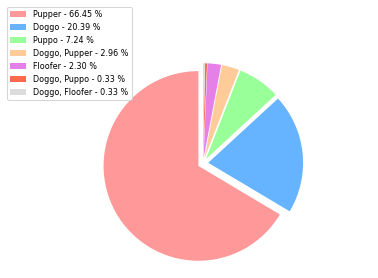

In [112]:
x = np.char.array(['Pupper', 'Doggo', 'Puppo', 'Doggo, Pupper', 'Floofer', 'Doggo, Puppo', 'Doggo, Floofer'])
y = np.array(list(df[df['dog_stage'] != 'None']['dog_stage'].value_counts())[0:7])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#E580E8','#FF684F','#DCDCDD']
porcent = 100.*y/y.sum()
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1) 
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.8,  explode = explode)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]




plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.axis('equal')

plt.savefig('Most_common_dog.png', bbox_inches='tight')

In [113]:
#common rating?
df_integer_ratings_14 = df[(df.rating_numerator <= 14) & (df.rating_numerator.apply(float.is_integer))]
subset_rating_counts = df_integer_ratings_14.groupby(['rating_numerator']).count()['tweet_id']

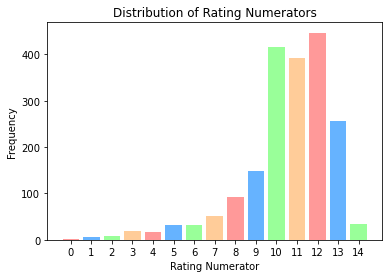

In [114]:
plt.bar(np.arange(15), subset_rating_counts, color=('#ff9999','#66b3ff','#99ff99','#ffcc99'))
plt.xticks(np.arange(15))
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Numerators');

plt.savefig('Most_common_rates.png', bbox_inches='tight')

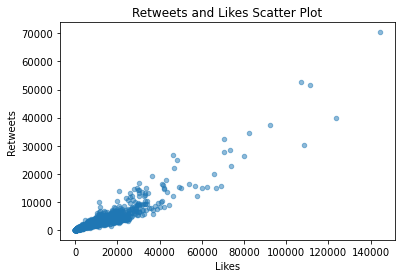

In [116]:
#Retweets vs. Likes

df.plot(kind='scatter',x='favorites',y='retweets', alpha = 0.5)
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.title('Retweets and Likes Scatter Plot')

plt.savefig('Retweets_vs_Likes.png', bbox_inches='tight')

Retweets are positively correlated with Likes.